Purvit Vashishtha, purvitsharma(GITHUB)

# Machine Learning and Deep Learning Models for Financial Analysis

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import copy as copy
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df_stock = pd.read_csv("stock.csv")

In [4]:
df_stock

Date        AAPL          BA          T        MGM         AMZN  \
0     2012-01-12   60.198570   75.510002  30.120001  12.130000   175.929993   
1     2012-01-13   59.972858   74.599998  30.070000  12.350000   178.419998   
2     2012-01-17   60.671429   75.239998  30.250000  12.250000   181.660004   
3     2012-01-18   61.301430   75.059998  30.330000  12.730000   189.440002   
4     2012-01-19   61.107143   75.559998  30.420000  12.800000   194.449997   
...          ...         ...         ...        ...        ...          ...   
2154  2020-08-05  440.250000  174.279999  29.850000  16.719999  3205.030029   
2155  2020-08-06  455.609985  172.199997  29.840000  18.459999  3225.000000   
2156  2020-08-07  444.450012  170.020004  30.020000  19.030001  3167.459961   
2157  2020-08-10  450.910004  179.410004  30.200001  21.650000  3148.159912   
2158  2020-08-11  437.500000  180.130005  30.200001  21.500000  3080.669922   

             IBM         TSLA         GOOG        sp500  
0     180.550003    28.250000   313.644379  1295.500000  
1     179.160004    22.790001   311.328064  1289.089966  
2     180.000000    26.600000   313.116364  1293.670044  
3     181.070007    26.809999   315.273285  1308.040039  
4     180.520004    26.760000   318.590851  1314.500000  
...          ...          ...          ...          ...  
2154  125.449997  1485.020020  1473.609985  3327.770020  
2155  126.120003  1489.579956  1500.099976  3349.159912  
2156  124.959999  1452.709961  1494.489990  3351.280029  
2157  127.110001  1418.569946  1496.099976  3360.469971  
2158  126.750000  1374.390015  1480.319946  3333.689941  

[2159 rows x 10 columns]

In [5]:
df_stock_vol = pd.read_csv("stock_volume.csv")

In [6]:
df_stock_vol

Date      AAPL        BA         T       MGM     AMZN      IBM  \
0     2012-01-12  53146800   3934500  26511100  17891100  5385800  6881000   
1     2012-01-13  56505400   4641100  22096800  16621800  4753500  5279200   
2     2012-01-17  60724300   3700100  23500200  15480800  5644500  6003400   
3     2012-01-18  69197800   4189500  22015000  18387600  7473500  4600600   
4     2012-01-19  65434600   5397300  25524000  14022900  7096000  8567200   
...          ...       ...       ...       ...       ...      ...      ...   
2154  2020-08-05  30498000  46551000  22991700  18914200  3930000  3675400   
2155  2020-08-06  50607200  32921600  21908700  35867700  3940600  3417100   
2156  2020-08-07  49453300  19301600  30398500  34530300  3929600  3651000   
2157  2020-08-10  53100900  35857700  35514400  71219700  3167300  3968300   
2158  2020-08-11  46871100  60966900  30978300  34357900  3706600  4998500   

         TSLA      GOOG       sp500  
0      729300   3764400  4019890000  
1     5500400   4631800  3692370000  
2     4651600   3832800  4010490000  
3     1260200   5544000  4096160000  
4     1246300  12657800  4465890000  
...       ...       ...         ...  
2154  4978000   1979500  4732220000  
2155  5992300   1995400  4267490000  
2156  8883500   1576600  4104860000  
2157  7522300   1289300  4318570000  
2158  8356000   1452000  5087650000  

[2159 rows x 10 columns]

In [7]:
df_stock = df_stock.sort_values(by=('Date'))
df_stock

Date        AAPL          BA          T        MGM         AMZN  \
0     2012-01-12   60.198570   75.510002  30.120001  12.130000   175.929993   
1     2012-01-13   59.972858   74.599998  30.070000  12.350000   178.419998   
2     2012-01-17   60.671429   75.239998  30.250000  12.250000   181.660004   
3     2012-01-18   61.301430   75.059998  30.330000  12.730000   189.440002   
4     2012-01-19   61.107143   75.559998  30.420000  12.800000   194.449997   
...          ...         ...         ...        ...        ...          ...   
2154  2020-08-05  440.250000  174.279999  29.850000  16.719999  3205.030029   
2155  2020-08-06  455.609985  172.199997  29.840000  18.459999  3225.000000   
2156  2020-08-07  444.450012  170.020004  30.020000  19.030001  3167.459961   
2157  2020-08-10  450.910004  179.410004  30.200001  21.650000  3148.159912   
2158  2020-08-11  437.500000  180.130005  30.200001  21.500000  3080.669922   

             IBM         TSLA         GOOG        sp500  
0     180.550003    28.250000   313.644379  1295.500000  
1     179.160004    22.790001   311.328064  1289.089966  
2     180.000000    26.600000   313.116364  1293.670044  
3     181.070007    26.809999   315.273285  1308.040039  
4     180.520004    26.760000   318.590851  1314.500000  
...          ...          ...          ...          ...  
2154  125.449997  1485.020020  1473.609985  3327.770020  
2155  126.120003  1489.579956  1500.099976  3349.159912  
2156  124.959999  1452.709961  1494.489990  3351.280029  
2157  127.110001  1418.569946  1496.099976  3360.469971  
2158  126.750000  1374.390015  1480.319946  3333.689941  

[2159 rows x 10 columns]

In [8]:
df_stock.isnull().sum()

Date     0
AAPL     0
BA       0
T        0
MGM      0
AMZN     0
IBM      0
TSLA     0
GOOG     0
sp500    0
dtype: int64

In [9]:
df_stock_vol.isnull().sum()

Date     0
AAPL     0
BA       0
T        0
MGM      0
AMZN     0
IBM      0
TSLA     0
GOOG     0
sp500    0
dtype: int64

In [10]:
df_stock.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2159 entries, 0 to 2158
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2159 non-null   object 
 1   AAPL    2159 non-null   float64
 2   BA      2159 non-null   float64
 3   T       2159 non-null   float64
 4   MGM     2159 non-null   float64
 5   AMZN    2159 non-null   float64
 6   IBM     2159 non-null   float64
 7   TSLA    2159 non-null   float64
 8   GOOG    2159 non-null   float64
 9   sp500   2159 non-null   float64
dtypes: float64(9), object(1)
memory usage: 185.5+ KB


In [11]:
df_stock_vol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2159 entries, 0 to 2158
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    2159 non-null   object
 1   AAPL    2159 non-null   int64 
 2   BA      2159 non-null   int64 
 3   T       2159 non-null   int64 
 4   MGM     2159 non-null   int64 
 5   AMZN    2159 non-null   int64 
 6   IBM     2159 non-null   int64 
 7   TSLA    2159 non-null   int64 
 8   GOOG    2159 non-null   int64 
 9   sp500   2159 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 168.8+ KB


In [12]:
df_stock.describe()

AAPL           BA            T          MGM         AMZN  \
count  2159.000000  2159.000000  2159.000000  2159.000000  2159.000000   
mean    140.819823   189.942700    35.162899    23.105743   915.665665   
std      70.827601   103.678586     3.207490     6.963847   697.838905   
min      55.790001    67.239998    26.770000     7.140000   175.929993   
25%      89.165714   124.015000    33.040001    18.545000   316.490005   
50%     116.599998   142.419998    34.930000    23.780001   676.010010   
75%     175.019997   297.044998    37.419998    28.430000  1593.645019   
max     455.609985   440.619995    43.470001    38.029999  3225.000000   

               IBM         TSLA         GOOG        sp500  
count  2159.000000  2159.000000  2159.000000  2159.000000  
mean    161.853001   259.600815   783.712512  2218.749554  
std      25.561938   210.988003   334.448057   537.321727  
min      94.769997    22.790001   278.481171  1278.040039  
25%     142.769997   184.595001   527.214416  1847.984985  
50%     156.949997   231.960007   737.599976  2106.629883  
75%     185.974998   307.350006  1079.744995  2705.810059  
max     215.800003  1643.000000  1568.489990  3386.149902

In [13]:
df_stock_vol.describe()

AAPL            BA             T           MGM          AMZN  \
count  2.159000e+03  2.159000e+03  2.159000e+03  2.159000e+03  2.159000e+03   
mean   5.820332e+07  6.419916e+06  2.832131e+07  9.845582e+06  4.102673e+06   
std    4.568141e+07  9.711873e+06  1.428911e+07  7.295753e+06  2.290722e+06   
min    1.136200e+07  7.889000e+05  6.862400e+06  9.507000e+05  8.813000e+05   
25%    2.769930e+07  3.031850e+06  2.002150e+07  5.796450e+06  2.675700e+06   
50%    4.209420e+07  3.991000e+06  2.485930e+07  7.899800e+06  3.494800e+06   
75%    7.182480e+07  5.325900e+06  3.210565e+07  1.104055e+07  4.768150e+06   
max    3.765300e+08  1.032128e+08  1.950827e+08  9.009820e+07  2.385610e+07   

                IBM          TSLA          GOOG         sp500  
count  2.159000e+03  2.159000e+03  2.159000e+03  2.159000e+03  
mean   4.453090e+06  7.001302e+06  2.498238e+06  3.680732e+09  
std    2.462811e+06  5.781208e+06  1.928407e+06  8.622717e+08  
min    1.193000e+06  3.649000e+05  7.900000e+03  1.248960e+09  
25%    3.111250e+06  3.433450e+06  1.325400e+06  3.211890e+09  
50%    3.825000e+06  5.581100e+06  1.813900e+06  3.526890e+09  
75%    4.937300e+06  8.619550e+06  3.245350e+06  3.933290e+09  
max    3.049020e+07  6.093880e+07  2.497790e+07  9.044690e+09

In [14]:
def individual_stock(price_df, vol_df, name):
    return pd.DataFrame({'Date':price_df['Date'], 'Close':price_df[name], 'Vol': vol_df[name]})

In [15]:
def trading_window(data):
    n=1
    data['Target'] = data['Close'].shift(-n)
    return data

In [16]:
price_vol_df = individual_stock(df_stock,df_stock_vol,'AAPL')

In [17]:
target_df = trading_window(price_vol_df)
target_df

Date       Close       Vol      Target
0     2012-01-12   60.198570  53146800   59.972858
1     2012-01-13   59.972858  56505400   60.671429
2     2012-01-17   60.671429  60724300   61.301430
3     2012-01-18   61.301430  69197800   61.107143
4     2012-01-19   61.107143  65434600   60.042858
...          ...         ...       ...         ...
2154  2020-08-05  440.250000  30498000  455.609985
2155  2020-08-06  455.609985  50607200  444.450012
2156  2020-08-07  444.450012  49453300  450.910004
2157  2020-08-10  450.910004  53100900  437.500000
2158  2020-08-11  437.500000  46871100         NaN

[2159 rows x 4 columns]

In [18]:
target_df = target_df[:-1]
target_df

Date       Close       Vol      Target
0     2012-01-12   60.198570  53146800   59.972858
1     2012-01-13   59.972858  56505400   60.671429
2     2012-01-17   60.671429  60724300   61.301430
3     2012-01-18   61.301430  69197800   61.107143
4     2012-01-19   61.107143  65434600   60.042858
...          ...         ...       ...         ...
2153  2020-08-04  438.660004  43267900  440.250000
2154  2020-08-05  440.250000  30498000  455.609985
2155  2020-08-06  455.609985  50607200  444.450012
2156  2020-08-07  444.450012  49453300  450.910004
2157  2020-08-10  450.910004  53100900  437.500000

[2158 rows x 4 columns]

Scaling the Data using MinMaxScaler

In [19]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
target_scaled_df = sc.fit_transform(target_df.drop(columns=['Date']))
target_scaled_df

array([[0.01102638, 0.11442624, 0.01046185],
       [0.01046185, 0.12362365, 0.01220906],
       [0.01220906, 0.13517696, 0.01378478],
       ...,
       [1.        , 0.10747163, 0.97208751],
       [0.97208751, 0.10431171, 0.98824476],
       [0.98824476, 0.11430054, 0.95470465]])

In [20]:
target_scaled_df.shape

(2158, 3)

In [21]:
X = target_scaled_df[:,:2]
y = target_scaled_df[:,2:]

In [22]:
y.shape

(2158, 1)

In [23]:
X.shape

(2158, 2)

Splitting Data into Training and Testing Set

In [24]:
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=0.34, random_state=0)

In [25]:
X_train.shape

(1424, 2)

In [26]:
def show_plot(data, title):
    plt.figure(figsize=(15,7))
    plt.plot(data, linewidth=3)
    plt.grid()
    plt.show()

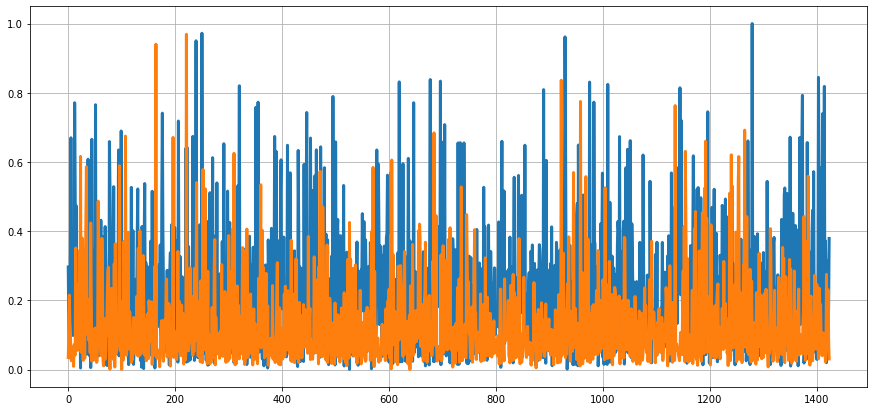

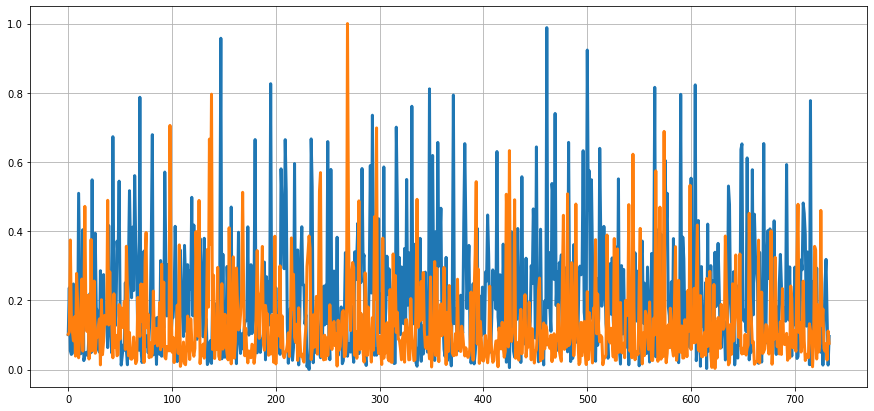

In [27]:
show_plot(X_train,"Training data")
show_plot(X_test,"Testing Data")

Applying Ridge Regression to predict the continuous values

In [28]:
from sklearn.linear_model import Ridge
regressor = Ridge()
regressor.fit(X_train, y_train)

Ridge()

In [29]:
lr_accuracy = regressor.score(X_test,y_test )
print("Ridge Regression Score:")
lr_accuracy

Ridge Regression Score:


0.9966245112170802

In [30]:
predicted_price = regressor.predict(X)
predicted_price

array([[0.0171045 ],
       [0.0163879 ],
       [0.01787958],
       ...,
       [0.98022886],
       [0.95310683],
       [0.96865845]])

In [31]:
predictor = []
for i in predicted_price:
    predictor.append(i[0])

In [32]:
len(predictor)

2158

In [33]:
close = []
for i in target_scaled_df:
    close.append(i[0])

In [34]:
df_predicted = target_df[['Date']]
df_predicted

Date
0     2012-01-12
1     2012-01-13
2     2012-01-17
3     2012-01-18
4     2012-01-19
...          ...
2153  2020-08-04
2154  2020-08-05
2155  2020-08-06
2156  2020-08-07
2157  2020-08-10

[2158 rows x 1 columns]

In [35]:
df_predicted['Close'] = close
df_predicted

<ipython-input-35-334592c41fb5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_predicted['Close'] = close


Date     Close
0     2012-01-12  0.011026
1     2012-01-13  0.010462
2     2012-01-17  0.012209
3     2012-01-18  0.013785
4     2012-01-19  0.013299
...          ...       ...
2153  2020-08-04  0.957606
2154  2020-08-05  0.961583
2155  2020-08-06  1.000000
2156  2020-08-07  0.972088
2157  2020-08-10  0.988245

[2158 rows x 2 columns]

In [36]:
df_predicted['Predictions'] = predictor
df_predicted

<ipython-input-36-d94c2685fd11>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_predicted['Predictions'] = predictor


Date     Close  Predictions
0     2012-01-12  0.011026     0.017104
1     2012-01-13  0.010462     0.016388
2     2012-01-17  0.012209     0.017880
3     2012-01-18  0.013785     0.018993
4     2012-01-19  0.013299     0.018707
...          ...       ...          ...
2153  2020-08-04  0.957606     0.939313
2154  2020-08-05  0.961583     0.943820
2155  2020-08-06  1.000000     0.980229
2156  2020-08-07  0.972088     0.953107
2157  2020-08-10  0.988245     0.968658

[2158 rows x 3 columns]

In [37]:
import plotly.express as px
import plotly.figure_factory as ff

def interactive_plot(df, title):
  figure = px.line(title = title)
  for i in df.columns[1:]:
    figure.add_scatter(x = df['Date'], y = df[i], name = i)
  figure.show()

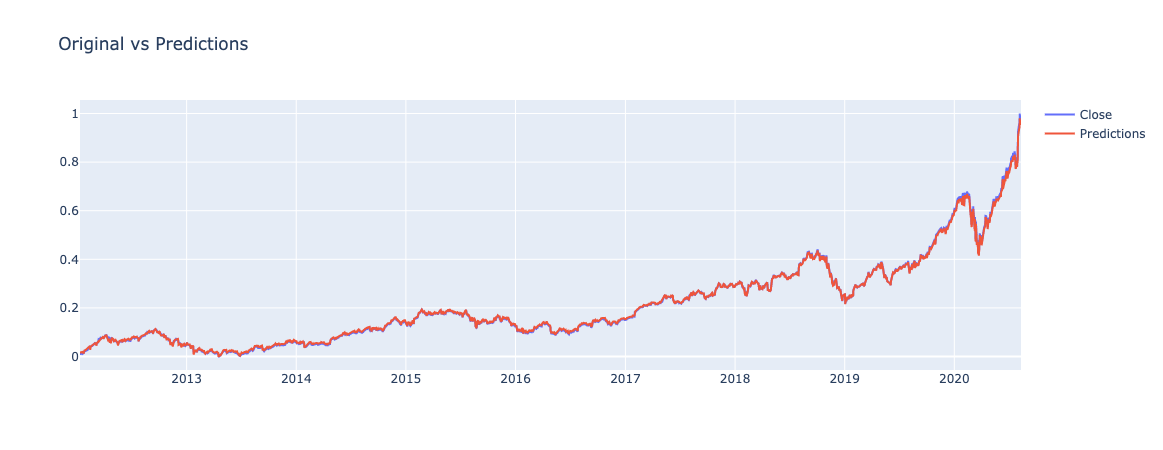

In [38]:
interactive_plot(df_predicted,"Original vs Predictions")

## LSTM Time Series Model

In [39]:
X_train= np.reshape(X_train,(X_train.shape[0], X_train.shape[1],1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))

In [40]:
X_train.shape, X_test.shape

((1424, 2, 1), (734, 2, 1))

In [41]:
from tensorflow import keras

In [42]:
inputs = keras.layers.Input(shape = (X_train.shape[1], X_train.shape[2]))
x = keras.layers.LSTM(150, return_sequences = True)(inputs)
x = keras.layers.LSTM(150, return_sequences = True)(x)
x = keras.layers.LSTM(150, return_sequences = True)(x)
outputs = keras.layers.Dense(1, activation='linear')(x)
model = keras.Model(inputs = inputs, outputs = outputs)
model.compile(optimizer = 'adam', loss = 'mse')
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 2, 1)]            0         
_________________________________________________________________
lstm (LSTM)                  (None, 2, 150)            91200     
_________________________________________________________________
lstm_1 (LSTM)                (None, 2, 150)            180600    
_________________________________________________________________
lstm_2 (LSTM)                (None, 2, 150)            180600    
_________________________________________________________________
dense (Dense)                (None, 2, 1)              151       
Total params: 452,551
Trainable params: 452,551
Non-trainable params: 0
_________________________________________________________________


In [43]:
history = model.fit(X_train, y_train, epochs=20, batch_size = 32, validation_split=0.2)

Epoch 1/20
36/36 [==============================] - 2s 47ms/step - loss: 0.0376 - val_loss: 0.0237
Epoch 2/20
36/36 [==============================] - 1s 15ms/step - loss: 0.0093 - val_loss: 0.0061
Epoch 3/20
36/36 [==============================] - 1s 16ms/step - loss: 0.0043 - val_loss: 0.0048
Epoch 4/20
36/36 [==============================] - 1s 15ms/step - loss: 0.0036 - val_loss: 0.0037
Epoch 5/20
36/36 [==============================] - 1s 18ms/step - loss: 0.0034 - val_loss: 0.0039
Epoch 6/20
36/36 [==============================] - 1s 18ms/step - loss: 0.0032 - val_loss: 0.0034
Epoch 7/20
36/36 [==============================] - 1s 15ms/step - loss: 0.0027 - val_loss: 0.0028
Epoch 8/20
36/36 [==============================] - 1s 19ms/step - loss: 0.0025 - val_loss: 0.0026
Epoch 9/20
36/36 [==============================] - 1s 19ms/step - loss: 0.0022 - val_loss: 0.0021
Epoch 10/20
36/36 [==============================] - 1s 17ms/step - loss: 0.0018 - val_loss: 0.0018
Epoch 11/

In [44]:
predictions = model.predict(X)

In [45]:
test_predicted = []
for i in predictions:
    test_predicted.append(i[0])

In [46]:
df_predicted = price_vol_df[1:][['Date']]
df_predicted

Date
1     2012-01-13
2     2012-01-17
3     2012-01-18
4     2012-01-19
5     2012-01-20
...          ...
2154  2020-08-05
2155  2020-08-06
2156  2020-08-07
2157  2020-08-10
2158  2020-08-11

[2158 rows x 1 columns]

In [47]:
test_predicted = np.asarray(test_predicted)

In [48]:
df_predicted['Predictions through Deep Learning'] = test_predicted

In [49]:
df_predicted

Date  Predictions through Deep Learning
1     2012-01-13                           0.028198
2     2012-01-17                           0.027731
3     2012-01-18                           0.029177
4     2012-01-19                           0.030482
5     2012-01-20                           0.030079
...          ...                                ...
2154  2020-08-05                           1.040848
2155  2020-08-06                           1.045861
2156  2020-08-07                           1.094465
2157  2020-08-10                           1.059118
2158  2020-08-11                           1.079558

[2158 rows x 2 columns]

In [50]:
df_predicted['Close'] = close[:]

In [51]:
df_predicted

Date  Predictions through Deep Learning     Close
1     2012-01-13                           0.028198  0.011026
2     2012-01-17                           0.027731  0.010462
3     2012-01-18                           0.029177  0.012209
4     2012-01-19                           0.030482  0.013785
5     2012-01-20                           0.030079  0.013299
...          ...                                ...       ...
2154  2020-08-05                           1.040848  0.957606
2155  2020-08-06                           1.045861  0.961583
2156  2020-08-07                           1.094465  1.000000
2157  2020-08-10                           1.059118  0.972088
2158  2020-08-11                           1.079558  0.988245

[2158 rows x 3 columns]

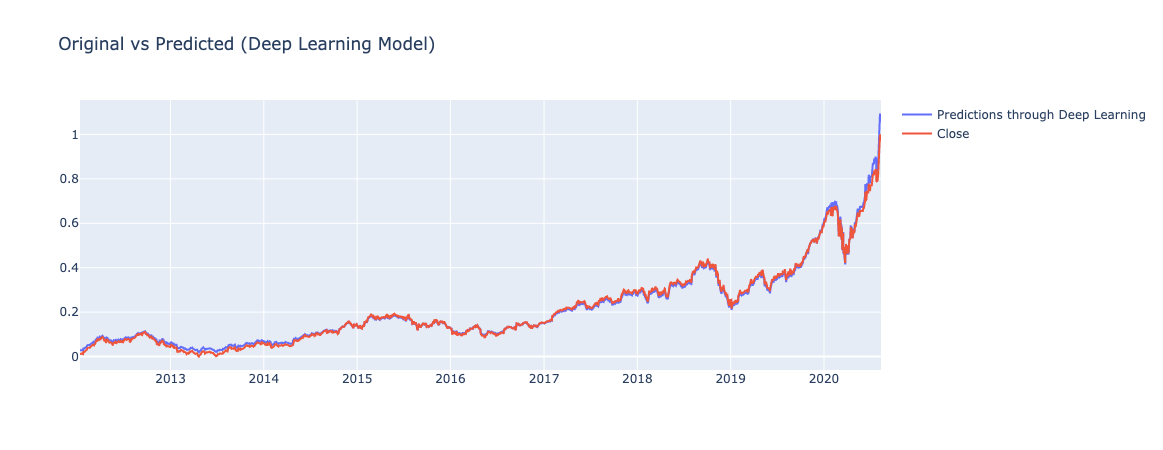

In [52]:
interactive_plot(df_predicted,"Original vs Predicted (Deep Learning Model)")

# Bank Market Segmentation using Unsupervised Machine Learning

In [53]:
creditcard_df = pd.read_csv('4. Marketing_data.csv')

In [54]:
creditcard_df

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001    40.900749           0.818182      95.40              0.00   
1     C10002  3202.467416           0.909091       0.00              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
3     C10004  1666.670542           0.636364    1499.00           1499.00   
4     C10005   817.714335           1.000000      16.00             16.00   
...      ...          ...                ...        ...               ...   
8945  C19186    28.493517           1.000000     291.12              0.00   
8946  C19187    19.183215           1.000000     300.00              0.00   
8947  C19188    23.398673           0.833333     144.40              0.00   
8948  C19189    13.457564           0.833333       0.00              0.00   
8949  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3        0.000000               NaN          0.000000      12  
4      678.334763        244.791237          0.000000      12  
...           ...               ...               ...     ...  
8945   325.594462         48.886365  

In [55]:
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [56]:
creditcard_df.info()
creditcard_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

In [57]:
creditcard_df[creditcard_df['ONEOFF_PURCHASES']== 40761.250000]

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
550  C10574  11547.52001                1.0   49039.57          40761.25   

     INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
550                 8278.32    558.166886                  1.0   

     ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
550                         1.0                          0.916667   

     CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
550                0.083333                 1            101       22500.0   

        PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
550  46930.59824       2974.069421              0.25      12

In [58]:
creditcard_df['CASH_ADVANCE'].max()

47137.211760000006

In [59]:
creditcard_df[creditcard_df['CASH_ADVANCE']==47137.211760000006]

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
2159  C12226  10905.05381                1.0     431.93             133.5   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
2159                  298.43   47137.21176             0.583333   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
2159                        0.25                               0.5   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
2159                     1.0               123             21       19600.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
2159  39048.59762       5394.173671               0.0      12

In [60]:
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull()== True),'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()

In [61]:
creditcard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        1
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [62]:
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull()==True),'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].mean()

In [63]:
creditcard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [64]:
creditcard_df.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000        864.206542          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [65]:
creditcard_df = creditcard_df.drop(columns='CUST_ID')

In [66]:
creditcard_df.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000        864.206542          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [67]:
creditcard_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

/Users/purvit/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/Users/purvit/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/Users/purvit/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

ValueError: num must be 1 <= num <= 17, not 18

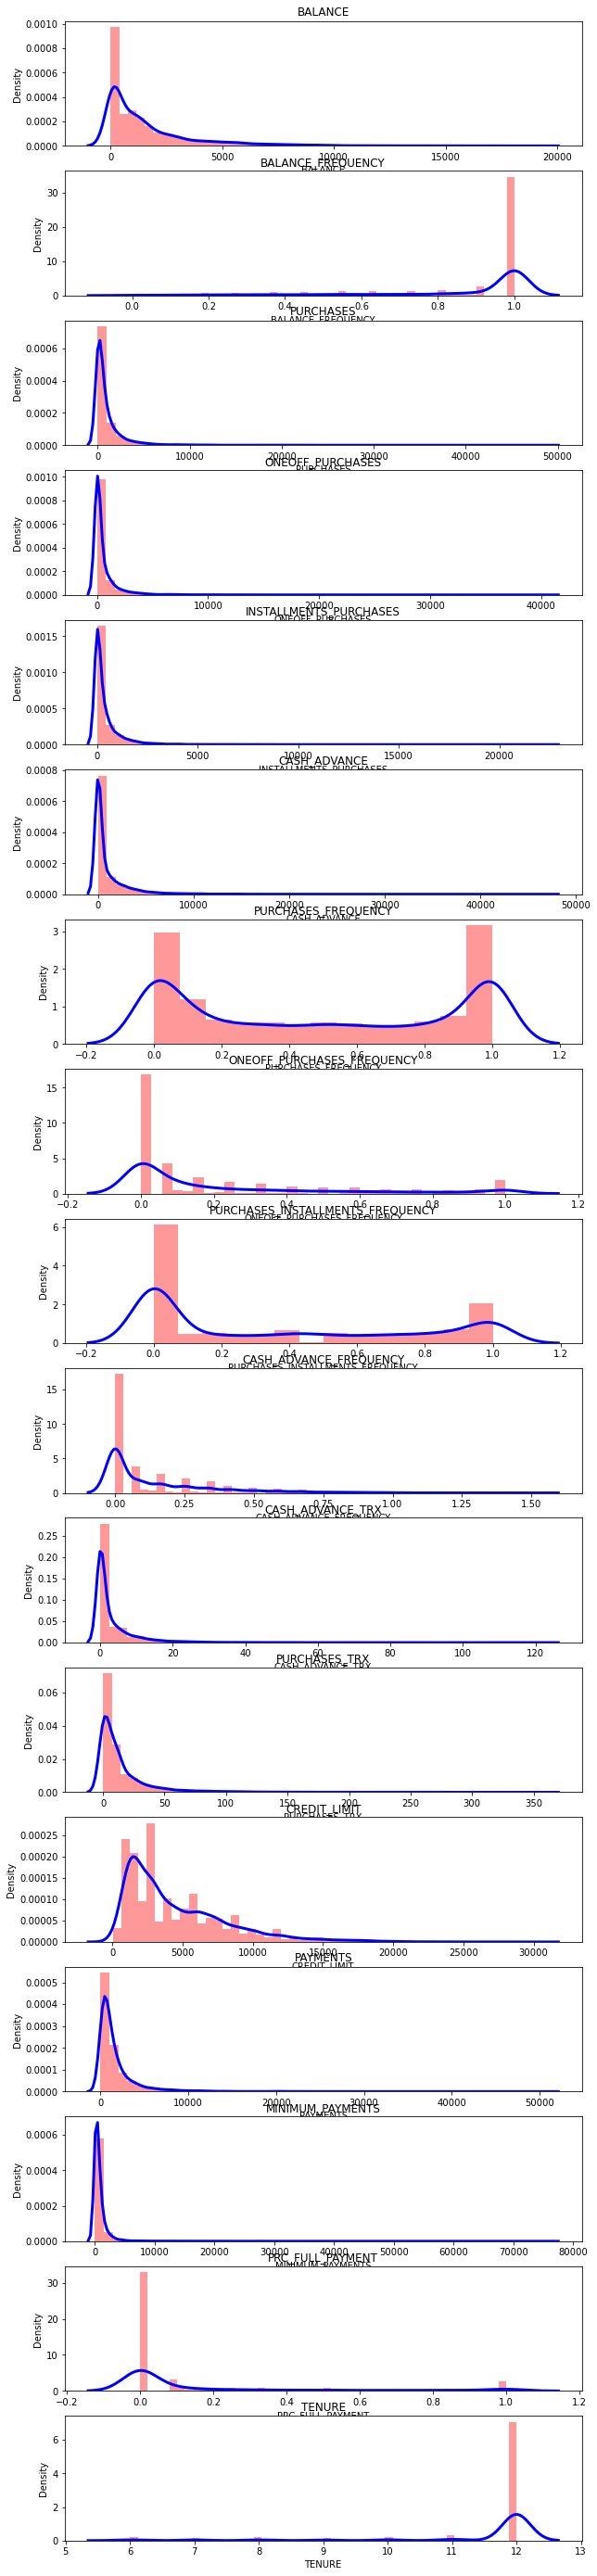

In [68]:
plt.figure(figsize=(10,50))
for i in range(len(creditcard_df)):
    plt.subplot(17,1,i+1)
    sns.distplot(creditcard_df[creditcard_df.columns[i]], kde_kws={'color':'b','lw':3,'label':'KDE'},hist_kws={'color':'r'})
    plt.title(creditcard_df.columns[i])
    
#plt.tight_layout()

In [69]:
correlations = creditcard_df.corr()

<AxesSubplot:>

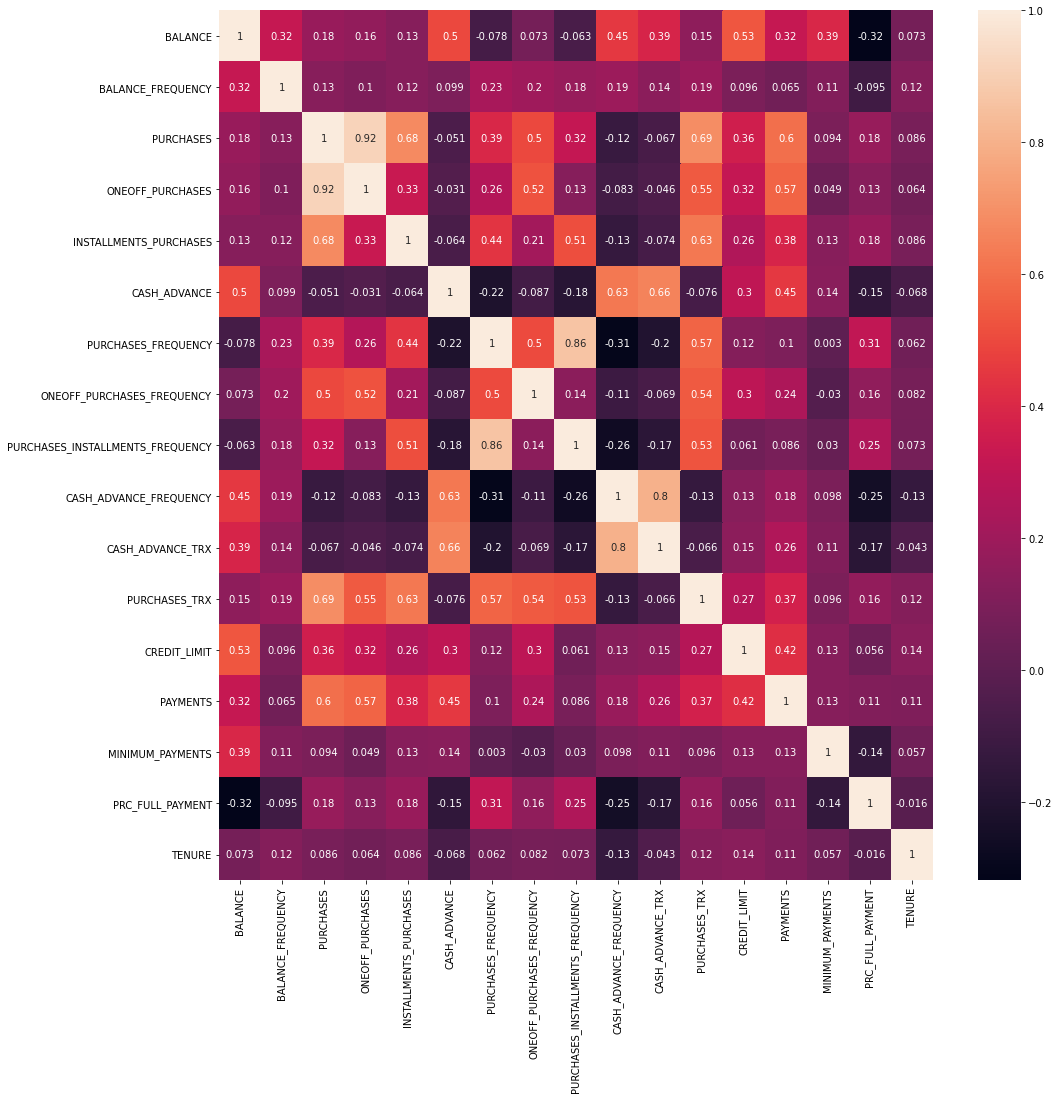

In [70]:
f, ax = plt.subplots(figsize=(16,16))
sns.heatmap(correlations,annot = True)

### Elbow Method for KMeans Clustering

In [71]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
creditcard_df_scaled = sc.fit_transform(creditcard_df)

In [72]:
creditcard_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

In [73]:
from sklearn.cluster import KMeans
score1 = []
range_values = range(1,15)
for i in range_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(creditcard_df_scaled)
    score1.append(kmeans.inertia_)

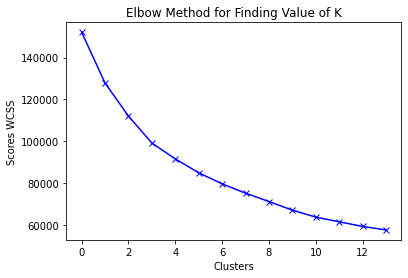

In [74]:
plt.plot(score1,'bx-')
plt.title("Elbow Method for Finding Value of K")
plt.xlabel("Clusters")
plt.ylabel('Scores WCSS')
plt.show()

In [75]:
kmeans = KMeans(8)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_

In [76]:
labels

array([7, 1, 6, ..., 5, 5, 5], dtype=int32)

In [77]:
kmeans.cluster_centers_.shape

(8, 17)

In [78]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns=creditcard_df.columns)

In [79]:
cluster_centers

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0 -0.364041           0.333338  -0.036669         -0.244037   
1  1.687219           0.391863  -0.217742         -0.156313   
2 -0.701229          -2.144116  -0.311099         -0.235720   
3  0.901817           0.466986   2.270963          1.756936   
4  1.923051           0.337717  11.212042         10.600367   
5 -0.336050          -0.347078  -0.289267         -0.215966   
6 -0.165602           0.392081   0.453574          0.593763   
7  0.017202           0.403746  -0.361527         -0.246826   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                0.361446     -0.363517             0.992316   
1               -0.227742      2.017788            -0.477650   
2               -0.302414     -0.321905            -0.556586   
3                2.141920     -0.195512             1.158629   
4                7.033118      0.419625             1.046983   
5               -0.286835      0.068284            -0.203078   
6               -0.018531     -0.333793             0.943763   
7               -0.401252     -0.090818            -0.865379   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   -0.386366                          1.207683   
1                   -0.213849                         -0.413842   
2                   -0.444989                         -0.439730   
3                    1.583889                          1.226198   
4                    1.915501                          0.981334   
5                   -0.288661                         -0.224549   
6                    1.879929                          0.088400   
7                   -0.410324                         -0.756666   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0               -0.475146         -0.361054       0.188708     -0.259882   
1                1.919074          1.933501      -0.266006      1.028777   
2               -0.520844         -0.376103      -0.419790     -0.177161   
3               -0.312181         -0.212097       2.781452      1.238947   
4               -0.258912          0.061229       5.362438      3.044064   
5                0.308663          0.000996      -0.388117     -0.567159   
6               -0.407420         -0.323238       0.523759      0.371782   
7                0.109874         -0.024556      -0.486263     -0.305198   

   PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT    TENURE  
0 -0.215699         -0.032229          0.315100  0.257484  
1  0.821809          0.554705         -0.391370  0.070564  
2 -0.202048         -0.256658          0.281550  0.199199  
3  1.290295          0.441655          0.304778  0.334182  
4  8.098975          1.120318          1.110132  0.310863  
5 -0.392680         -0.209145          0.014011 -3.203733  
6  0.085751         -0.162636          0.407198  0.260956  
7 -0.249647         -0.009621         -0.457071  0.272769

In [81]:
creditcard_df_cluster =  pd.concat([creditcard_df, pd.DataFrame({'cluster':labels})], axis = 1)
creditcard_df_cluster.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  cluster  
0   201.802084        139.509787          0.000000      12        7  
1  4103.032597       1072.340217          0.222222      12        1  
2   622.066742        627.284787          0.000000      12        6  
3     0.000000        864.206542          0.000000      12        7  
4   678.334763        244.791237          0.000000      12        7

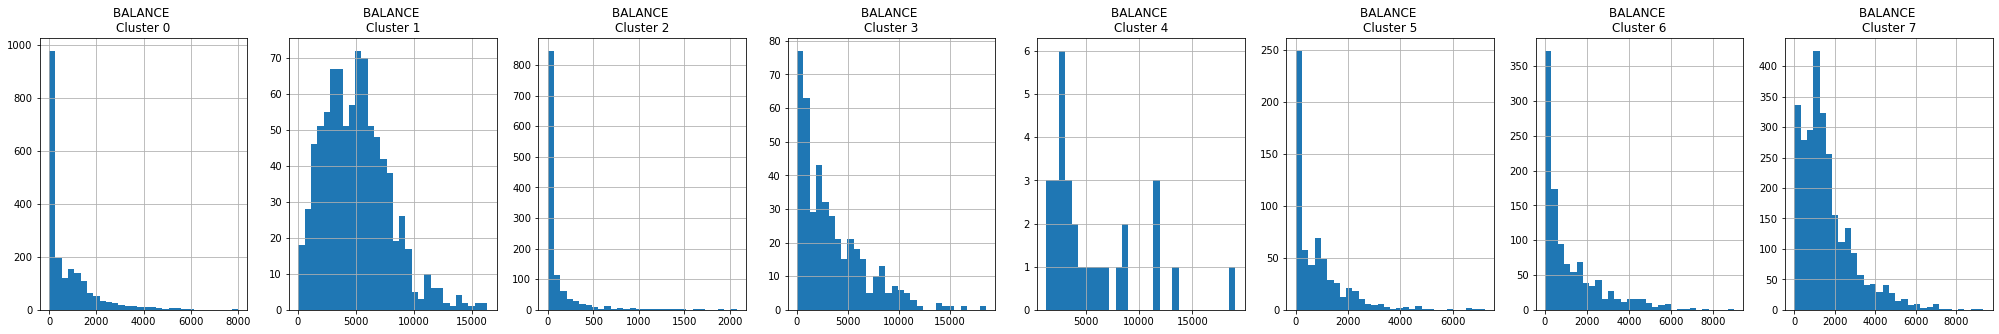

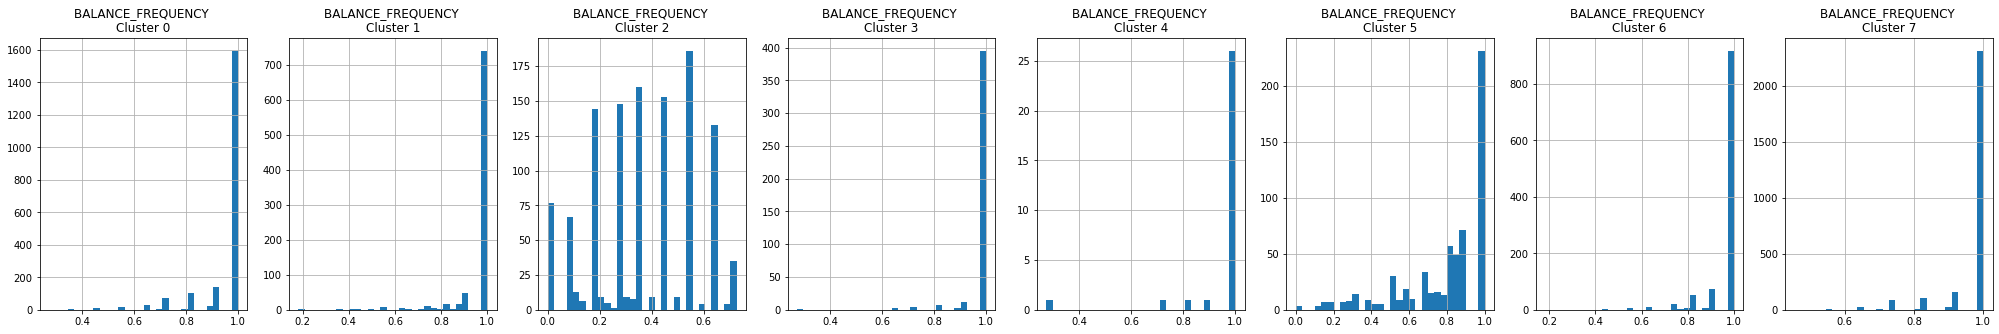

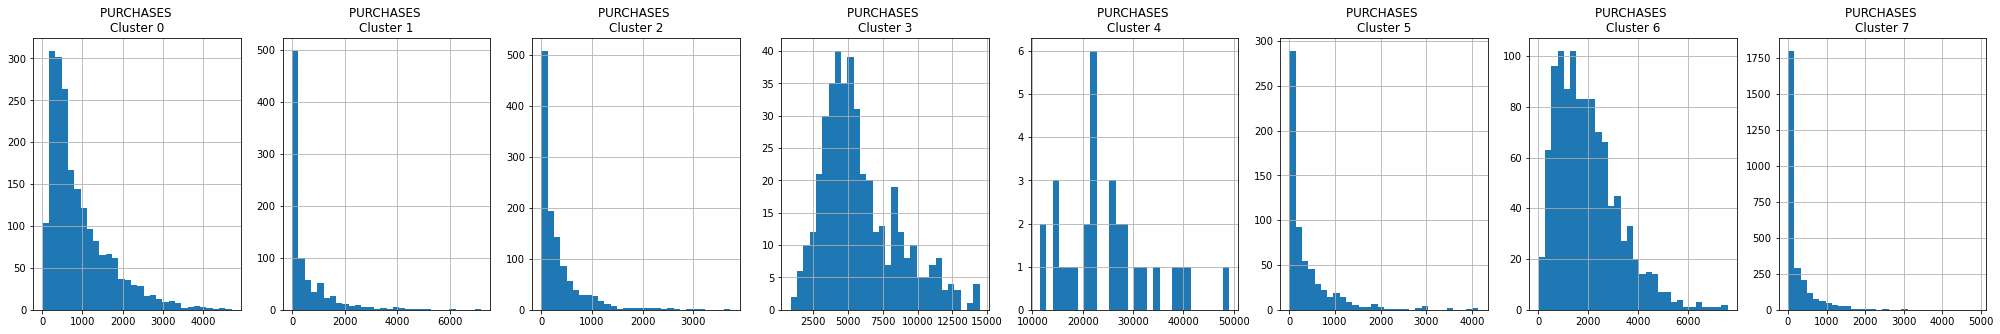

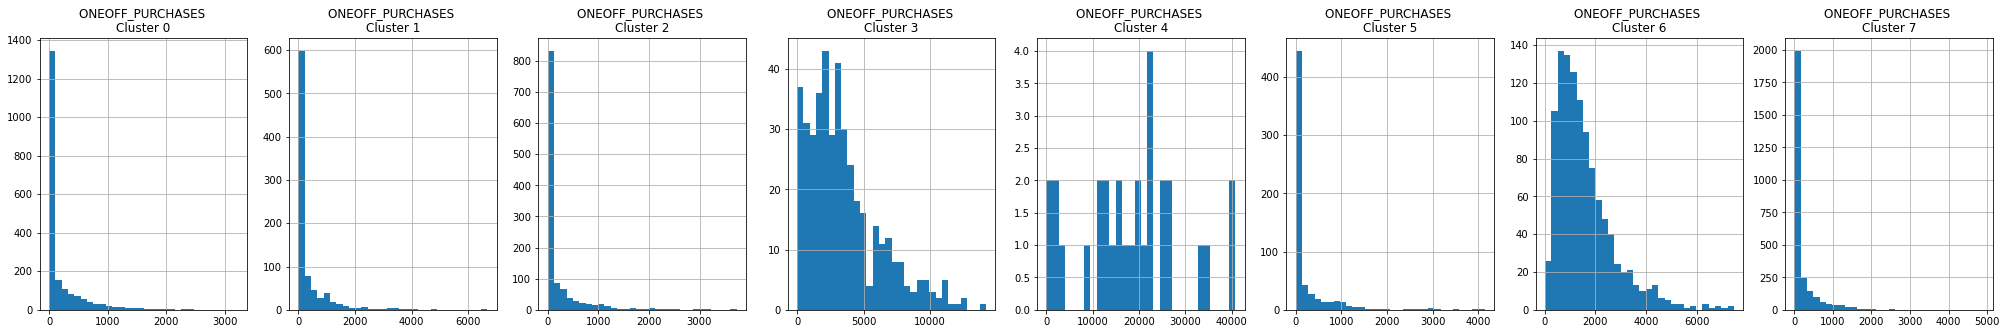

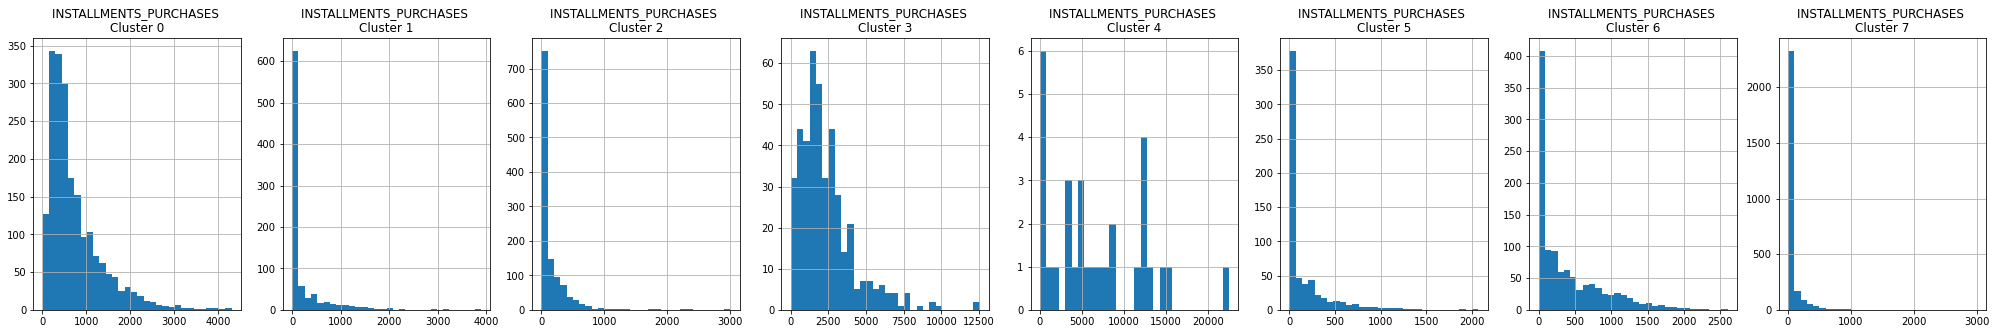

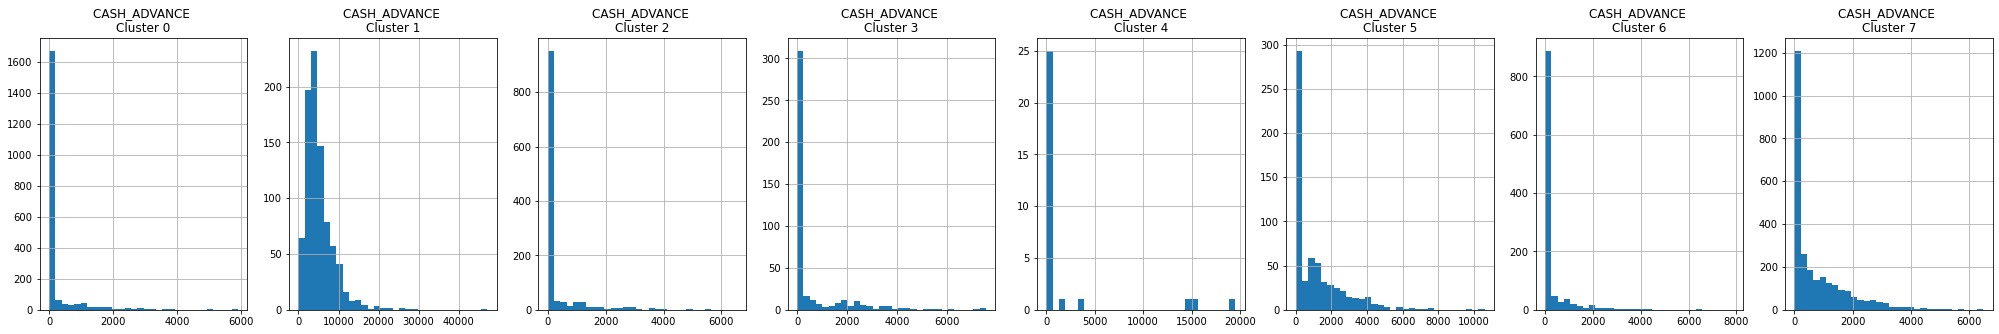

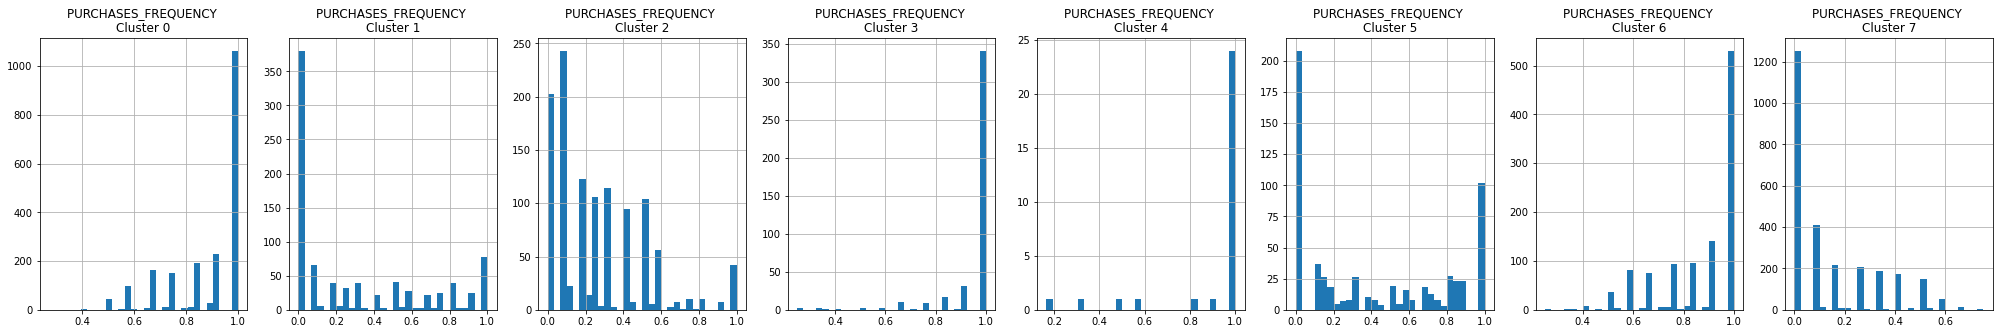

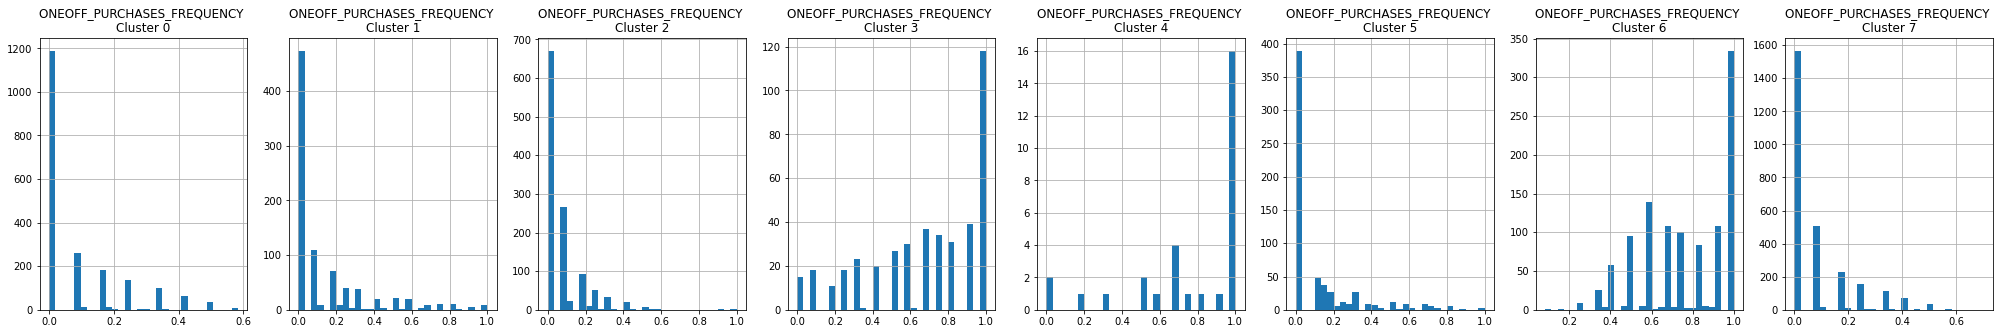

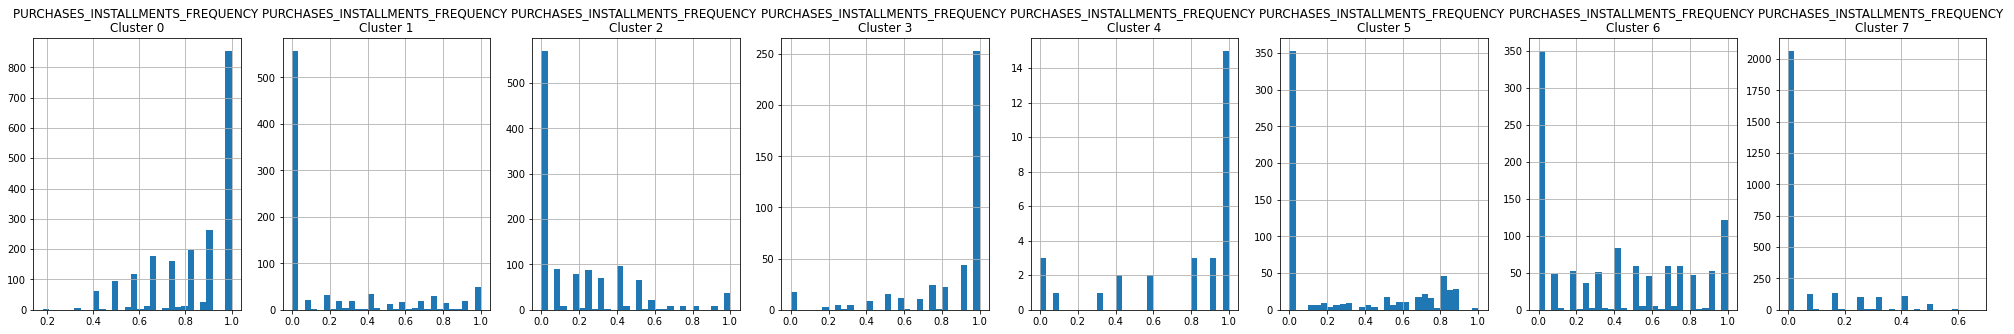

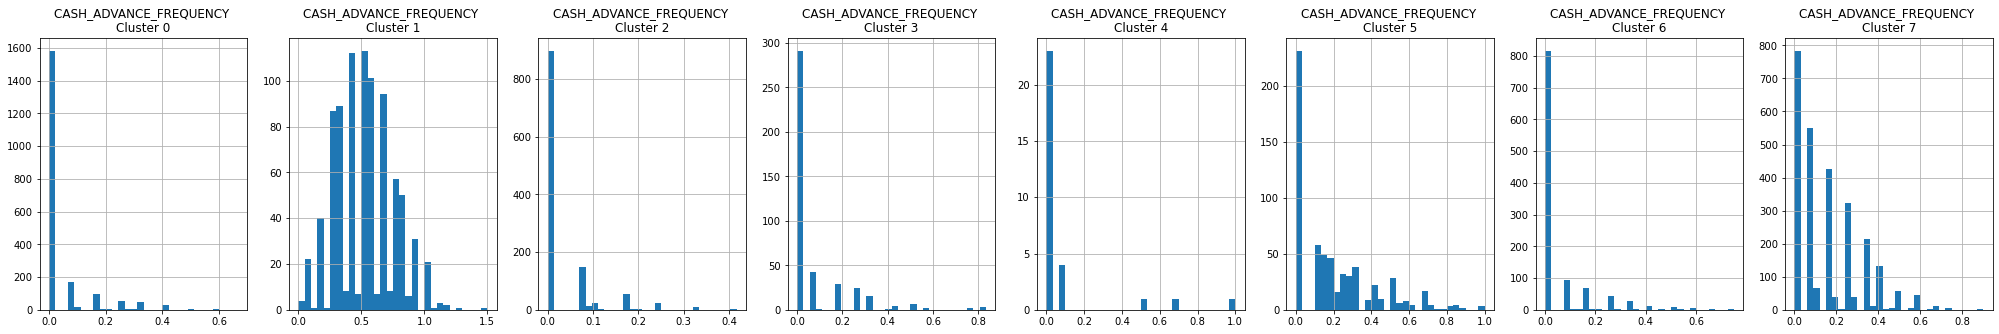

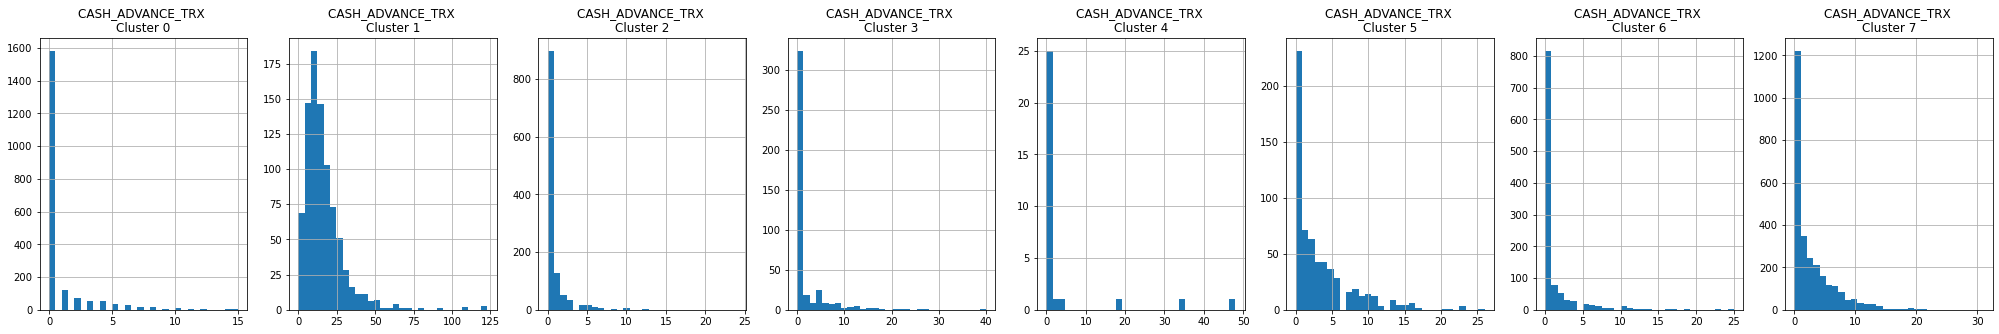

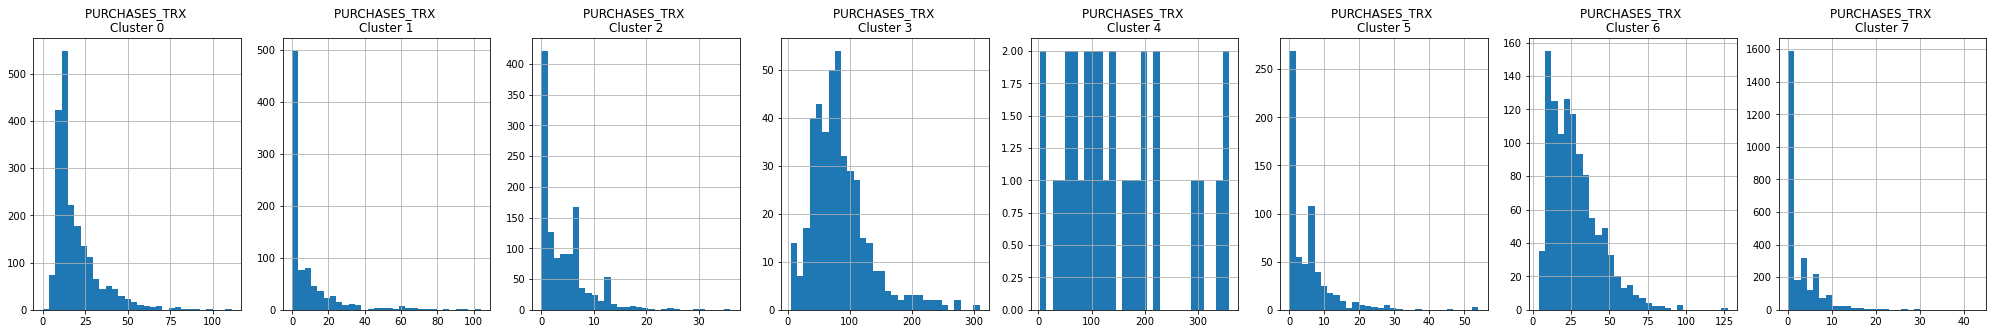

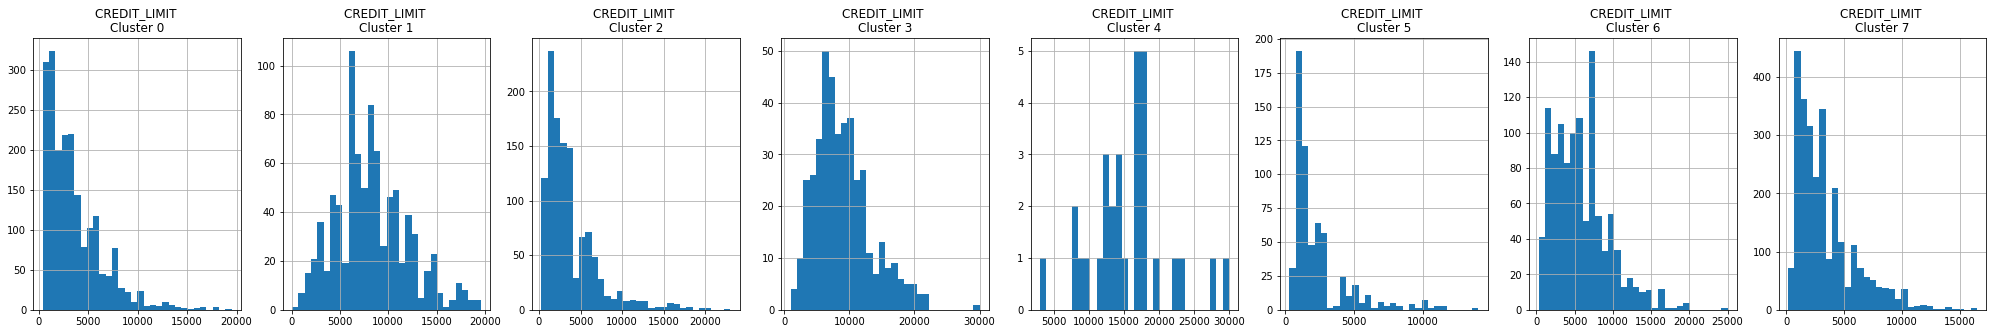

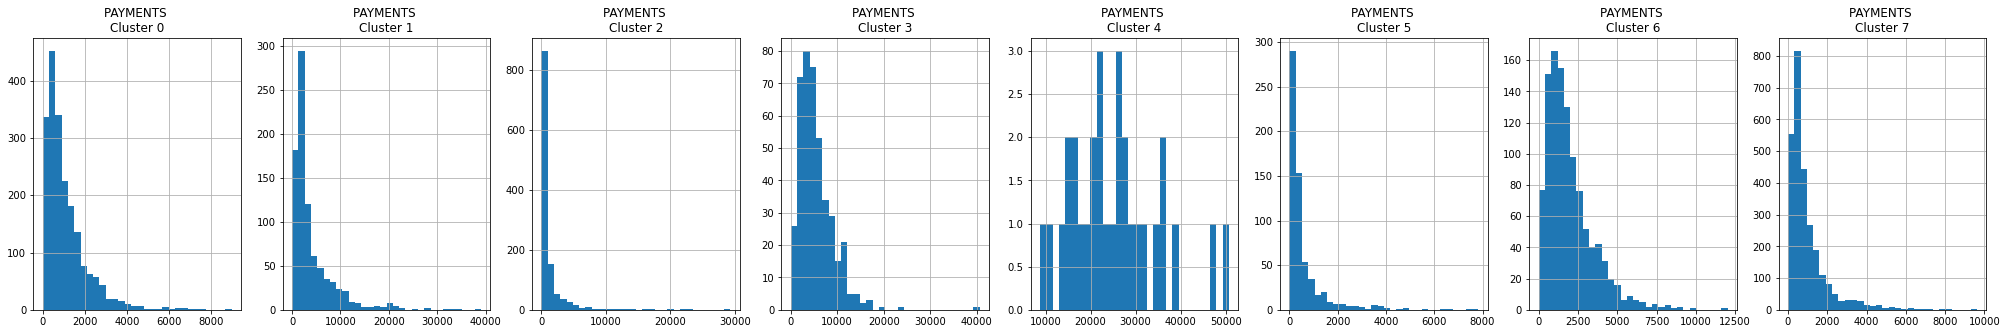

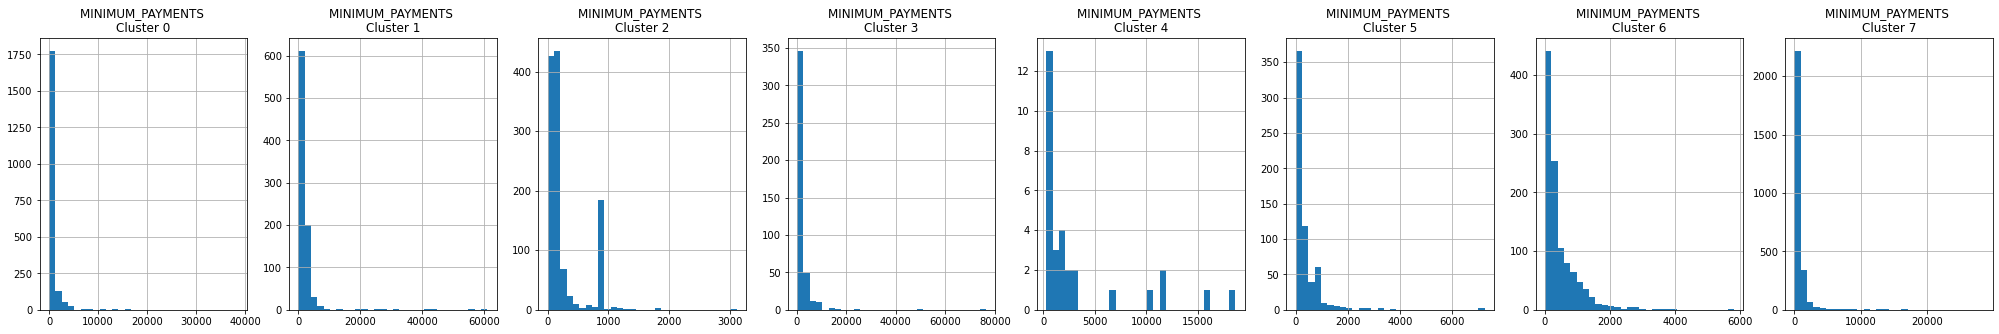

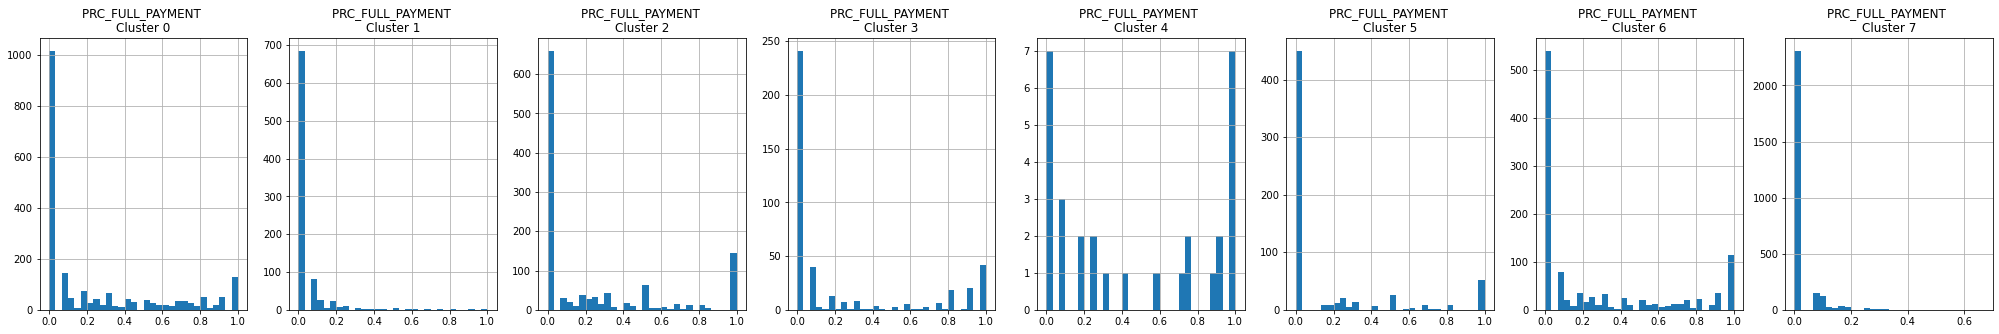

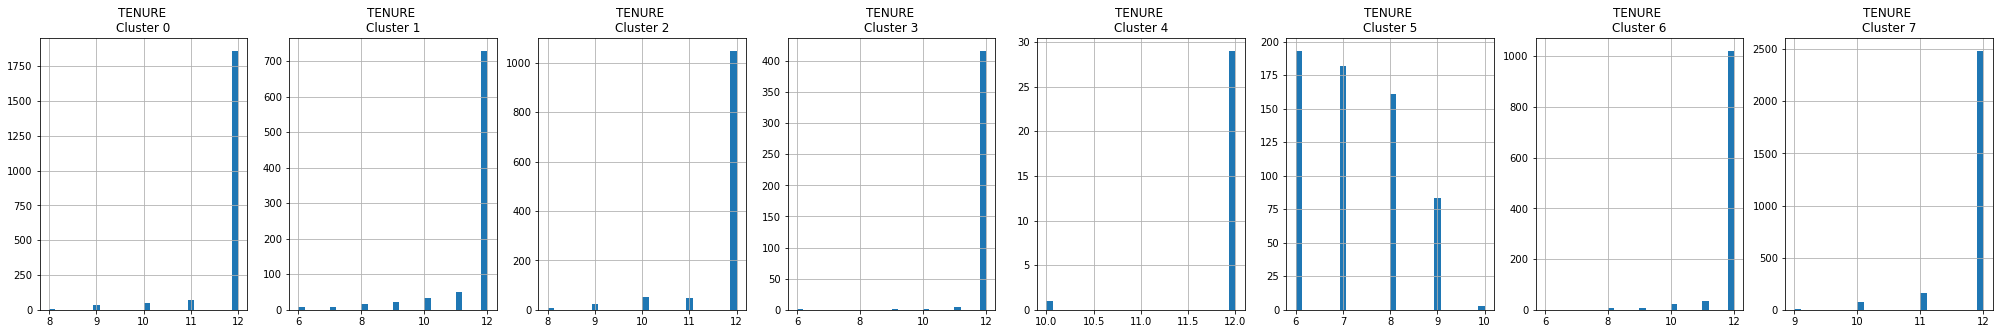

In [82]:
for i in creditcard_df.columns:
    plt.figure(figsize=(35,5))
    for j in range(8):
        plt.subplot(1,8,j+1)
        cluster = creditcard_df_cluster[creditcard_df_cluster['cluster']==j]
        cluster[i].hist(bins = 20)
        plt.title('{} \nCluster {}'.format(i,j))

plt.show()

# Dimensionality Reduction Using Principal Component Analysis

In [84]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(creditcard_df_scaled)
principal_comp

array([[-1.68222085, -1.07645088],
       [-1.13829438,  2.50646859],
       [ 0.96968331, -0.38351845],
       ...,
       [-0.92620463, -1.81078208],
       [-2.33655197, -0.65796293],
       [-0.55642064, -0.40046685]])

In [85]:
pca_df = pd.DataFrame(data = principal_comp,columns=['pca1','pca2'])

In [86]:
pca_df.head()

pca1      pca2
0 -1.682221 -1.076451
1 -1.138294  2.506469
2  0.969683 -0.383518
3 -0.873628  0.043162
4 -1.599435 -0.688579

In [87]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster':labels})], axis = 1)

In [88]:
pca_df.head()

pca1      pca2  cluster
0 -1.682221 -1.076451        7
1 -1.138294  2.506469        1
2  0.969683 -0.383518        6
3 -0.873628  0.043162        7
4 -1.599435 -0.688579        7

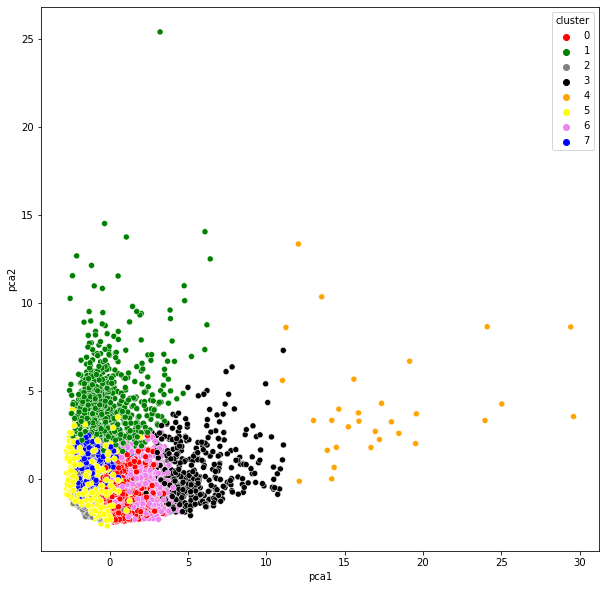

In [90]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x = 'pca1', y= 'pca2',hue = 'cluster',data = pca_df, palette=['red','green','grey','black','orange','yellow','violet','blue'])